<a href="https://colab.research.google.com/github/adrien-chinour/ia-data/blob/master/anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de la variance

## Import librairies et données

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [0]:
autos1 = pd.read_csv('https://www.labri.fr/~zemmari/datasets/autos_anova-1.csv', sep=";", decimal=',')
autos2 = pd.read_csv('https://www.labri.fr/~zemmari/datasets/autos_anova-2.csv', sep=";", decimal=',')

## ANOVA à 1 facteur

**Affichage du jeu de données :**

In [0]:
autos1.head()

,length,body_style
0,173.4,hatchback
1,158.7,hatchback
2,162.4,hardtop
3,188.8,sedan
4,190.9,sedan


On veut étudier ici l'influence du style de la voiture sur sa longueur.

On peut visualiser l'influence du style en affichant les boîtes à moustaches :

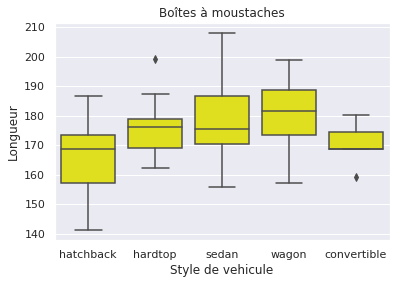

In [0]:
sns.set()

ax = sns.boxplot(x="body_style", y="length", data=autos1, color='yellow')
plt.xlabel('Style de vehicule')
plt.ylabel('Longueur')
plt.title('Boîtes à moustaches')
plt.show()

Il ne semble pas y avoir d'ecart significatif entre les médianes. Cependant, le style du véhicule semble avoir une influence sur sa longueur.

Le style Sedan dispose d'une large gamme de taille, la où le style Convertible dispose de longueur plus restreinte, malgres une valeur anormale base.

### Réalisation du test de Fisher

**On pose les hypothèses :**

- **HO** : Le style du véhicule n'a pas d'influence sur sa longueur
- **H1** : Le style du véhicule a une influence sur sa longueur




Étudions maintenant l'influence du style du véhicule sur sa longueur :

In [0]:
anova_style = smf.ols('length~body_style', data=autos1).fit()
print(anova_style.summary())

                            OLS Regression Results                            
Dep. Variable:                 length   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     13.38
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           1.11e-09
Time:                        15:02:09   Log-Likelihood:                -781.16
No. Observations:                 205   AIC:                             1572.
Df Residuals:                     200   BIC:                             1589.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Ici, la *p_valeur* est de `1.11e-09`, soit un résultat inferieur à **5%**. 

On **rejete donc l'hypothese H0** selon laquelle le style n'aurai pas d'influence sur la longueur.

**Tableau d'analyse de la variance :**

In [0]:
sm.stats.anova_lm(anova_style, typ=2)

,sum_sq,df,F,PR(>F)
body_style,6555.429695,4.0,13.381081,1.110878e-09
Residual,24495.142695,200.0,NaN,NaN


## ANOVA à 2 facteurs

On veut étudier ici la puissance des véhicules en fonction du type de carburant et le mode d’aspiration.


**Le jeu de données :**

In [0]:
autos2.head()

,fuel_type,aspiration,horsepower
0,gas,std,97.0
1,gas,std,62.0
2,gas,std,69.0
3,gas,turbo,162.0
4,diesel,turbo,123.0


In [0]:
anova_carbu_aspi = smf.ols('horsepower~aspiration*fuel_type', data=autos2).fit()
print(anova_carbu_aspi.summary())
sm.stats.anova_lm(anova_carbu_aspi)



                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     10.86
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           1.22e-06
Time:                        15:19:51   Log-Likelihood:                -1028.7
No. Observations:                 205   AIC:                             2065.
Df Residuals:                     201   BIC:                             2079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


,df,sum_sq,mean_sq,F,PR(>F)
aspiration,1.0,18381.548587,18381.548587,13.475474,0.000310
fuel_type,1.0,25989.701246,25989.701246,19.052995,0.000020
aspiration:fuel_type,1.0,50.556552,50.556552,0.037063,0.847531
Residual,201.0,274178.938715,1364.074322,NaN,NaN


On voit sur le tableau 3 lignes :

    - aspiration : qui teste l'effet de l'aspiration ;
    - fuel_type : qui teste l'effet du type de carburant ;
    - aspiration:fuel_type : qui teste les interactions aspiration-carburant.

La p-valeur des interactions (84.75 %) est très largement supérieure à 5 % ; on en déduit donc que les interactions n'ont pas d'impact sur le rendement.

**Le type de carburant et le type d'aspiration n'ont pas d'influence sur les chevaux.**